<a href="https://colab.research.google.com/github/strangehood/Qhack_FPPQT/blob/main/ClassicalSolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install pennylane

     |████████████████████████████████| 800 kB 8.7 MB/s 
     |████████████████████████████████| 7.8 MB 48.1 MB/s 
     |████████████████████████████████| 1.6 MB 36.6 MB/s 
     |████████████████████████████████| 108 kB 19.5 MB/s 


In [3]:
pip install ttpy

     |████████████████████████████████| 317 kB 10.2 MB/s 
  Created wheel for ttpy: filename=ttpy-1.2.1-cp37-cp37m-linux_x86_64.whl size=2961643 sha256=0f1d7fe9aa2b9039aaab9387b9255be36342206b0af9f8a02253774b7f889e4b
  Stored in directory: /root/.cache/pip/wheels/1c/45/02/9593e1923b244554f33e29be39b1413772acac8c8a1ba30596
Successfully built ttpy


In [4]:
pip install ncon

In [5]:
#importing part
import pennylane as qml
from pennylane import numpy as np

import tt
from tt.eigb import *

from scipy import optimize as opt

In [6]:
L = 7
j1 = 0.5
j2 = -1
J = np.zeros((L*L, L*L))
h = 0 * np.ones(L*L)

for i in range(L):
  for j in range(L):
    J[i * L + j, i * L + ((j + 1) % L)] = j1
    J[i * L + j, ((i + 1) % L) * L + j] = j1
    J[i * L + j, ((i + 1) % L) * L + ((j + 1) % L)] = j2
    J[i * L + j, ((i + 1) % L) * L + ((j - 1) % L)] = j2

def H_gen(J,h):

  def H_f(n):
    a = []
    for m in n:
      m = int(m)
      s = 0.5 * np.array([(m // 2**i) % 2 for i in range(N)]) - np.ones(N)
      a.append(float(s.T @ J @ s) + h.T @ s)
    return a

  N = J.shape[0]
  x = tt.xfun(n = 2, d = N)
  H = tt.multifuncrs([x], H_f, 1e-12, y0= tt.ones(n = 2, d = N), verb = 0)
  H = tt.diag(H)
  return(H)





x = tt.ones(n = 2, d = L * L)
y, lam = eigb(H_gen(J,h), x, 1e-8)

print(lam)
#print(Q, "\n", np.around(H_QUBO(Q).full(), decimals = 1))

[-49.]


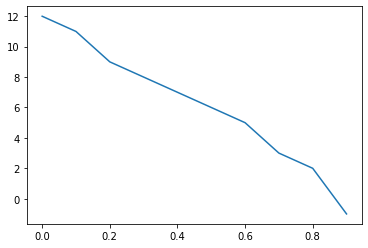

In [7]:
import matplotlib.pyplot as plt

a = []
N = 10
for i in range(N):
  L = 5
  j1 = 1 
  j2 = -1 * (1 * i / N)
  J = np.zeros((L*L, L*L))
  h =  0 * np.ones(L*L)  

  for i in range(L):
    for j in range(L):
      J[i * L + j, i * L + ((j + 1) % L)] = j1
      J[i * L + j, ((i + 1) % L) * L + j] = j1
      J[i * L + j, ((i + 1) % L) * L + ((j + 1) % L)] = j2
      J[i * L + j, ((i + 1) % L) * L + ((j - 1) % L)] = j2

  J = 0.5 * (J + J.T)  
  x = tt.ones(n = 2, d = L * L)
  y, lam = eigb(H_gen(J,h), x, 1e-12,verb = 0)
  a.append(int(lam))
  
plt.plot( (1 / N) * np.array(range(N)), a)
plt.show()